In [5]:
import pandas as pd
import numpy as np

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB, BernoulliNB

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('../assests/scaled_voice_data.csv')

In [22]:
df.head()

,meanfreq,sd,median,Q25,Q75,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx,gender
0,-1.017139,2.012536,0.155201,-1.784546,0.116305,-0.230102,1.407711,1.638474,0.699608,1.235429,0.317097,0.185051,female
1,-0.242956,1.167716,0.209318,-0.236093,0.295384,-0.244366,1.617131,1.963082,0.471396,0.061898,-1.072361,0.505507,female
2,0.594624,-0.628856,0.383436,0.459674,0.778532,-0.223221,0.329348,-1.721108,-0.005193,0.131058,0.996114,-0.042381,male
3,0.410492,-1.411220,0.306990,0.786895,-0.472162,-0.225505,-1.279564,-1.029810,0.466451,1.474043,3.100587,0.767026,female
4,0.804964,-1.414826,0.709370,0.811088,0.051118,-0.234219,-0.741627,-1.293786,0.707130,0.488538,0.692233,-0.538644,female


In [28]:
class NavieBayesianModels:

    def Gaussian_Naive_Bayes(x_train, y_train, x_test, y_test, i, k, display_stats=False):
        NB_model = GaussianNB()
        NB_model.fit(x_train,y_train)
        y_pred = NB_model.predict(x_test)

        # Accuracy, Precision, Recall, F1-score of Model
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted')
        recall = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        if display_stats:
            print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
            print(f"Accuracy: {accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1-score: {f1_score}")
            print()
            
        return np.array([accuracy, precision, recall, f1_score])


    def Bernoulli_Naive_Bayes(x_train, y_train, x_test, y_test, i, k, display_stats=False):
        NB_model = BernoulliNB()
        NB_model.fit(x_train,y_train)
        y_pred = NB_model.predict(x_test)

        # Accuracy, Precision, Recall, F1-score of Model
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted')
        recall = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        if display_stats:
            print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
            print(f"Accuracy: {accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1-score: {f1_score}")
            print()
            
        return np.array([accuracy, precision, recall, f1_score])

    # def __init__(self):
    #     if(model=="Gaussian"):
    #         Gaussian_Naive_Bayes()
    #     else if(model=="CategoricalNB"):
            

In [33]:
def RunModel():
    x = df.drop('gender', axis=1)
    y = df['gender']

    k = 10
    i = 0
    k_fold = KFold(n_splits=k)

    # Holds Mean of {accuracy, precision, recall, f1_score}
    mean_stats = np.zeros(4)

    for train_index, test_index in k_fold.split(x):
        x_train, x_test = x.loc[train_index], x.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        stats = NavieBayesianModels.Gaussian_Naive_Bayes(x_train, y_train, x_test, y_test, i:=i+1, k, display_stats=False)
        mean_stats = mean_stats + stats
        
    # Take mean of {accuracy, precision, recall, f1_score}
    mean_stats = mean_stats / k

    print(f"Mean accuracy: {mean_stats[0]}")
    print(f"Mean Precision: {mean_stats[1]}")
    print(f"Mean Recall: {mean_stats[2]}")
    print(f"Mean F1-score: {mean_stats[3]}")

RunModel()

Mean accuracy: 0.899944096154614
Mean Precision: 0.901324193932329
Mean Recall: 0.899944096154614
Mean F1-score: 0.8998483155418237


# ROC Curve for GaussianNB

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
# Removing Unnecessary warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [21]:
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('../assests/scaled_voice_data.csv')
x = df.drop('gender', axis=1)
y = df['gender']
le = LabelEncoder()
Y_encoded = le.fit_transform(y)

In [23]:
xtrain_roc,xtest_roc, ytrain_roc, ytest_roc = train_test_split(np.array(x), np.array(Y_encoded), test_size=0.2)
model_roc  =  GaussianNB()
model_roc.fit(xtrain_roc, ytrain_roc)
Y_predict_roc = model_roc.predict_proba(xtest_roc)

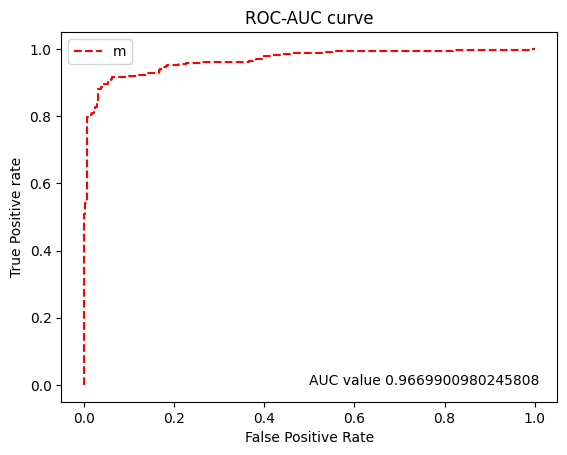

 Cass: male


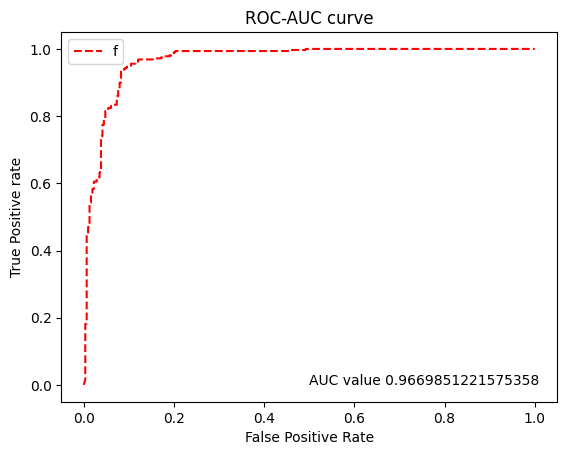

 Cass: female


In [24]:

def roc_auc(y_roc):
    lisrt=['male','female']
    for m in range(2):
        ls=[]
        for j in ytest_roc:
            if m==j:
                ls.append(1)
            else:
                ls.append(0)

        fpr, tpr, thresh =  metrics.roc_curve(ls,Y_predict_roc[:,m])
        auc = metrics.roc_auc_score(ls,Y_predict_roc[:,m])
        #plt.subplot(1,1,m)
        plt.plot(fpr, tpr,  label="AUC = " +str(auc), linestyle='--',color='red')
        plt.title('ROC-AUC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(lisrt[m])
        plt.text(0.5,0.0, 'AUC value ' + str(auc))
        # plt.savefig('ROC',dpi=300)
        plt.show()
        print(" Cass: " + lisrt[m])

roc_auc(Y_predict_roc)

# ROC curve for LR

In [25]:
from sklearn.linear_model import LogisticRegression 

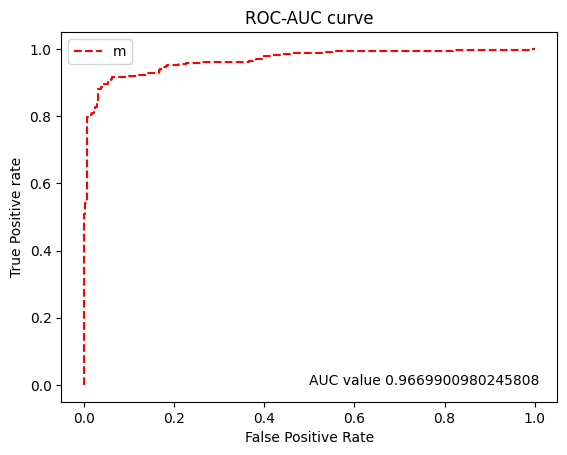

 Cass: male


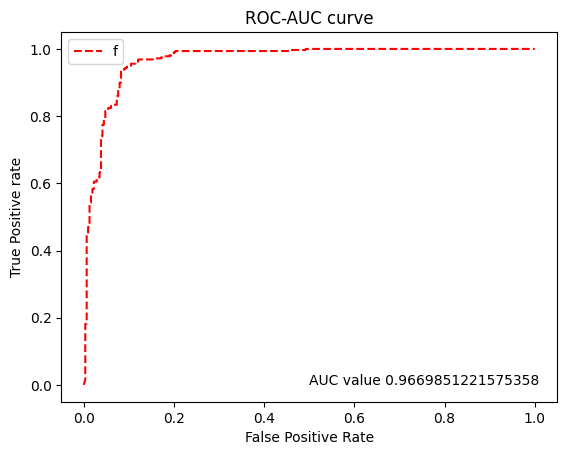

 Cass: female


In [26]:
log_reg_model = LogisticRegression(penalty='l2', max_iter=500)
log_reg_model.fit(xtrain_roc, ytrain_roc)
y_pred = log_reg_model.predict(xtest_roc)
roc_auc(y_pred)

# TSNE of given Data

In [27]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [29]:
import seaborn as sb

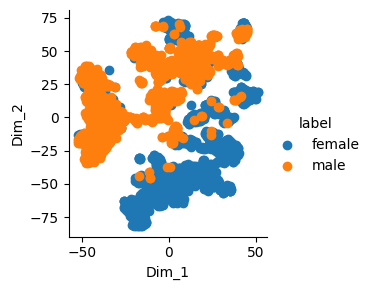

In [30]:
model = TSNE(n_components=2, random_state=0)

tsne_data = model.fit_transform(x)
y = df['gender']
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))# creating a new 
sb.FacetGrid(tsne_df, hue="label").map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

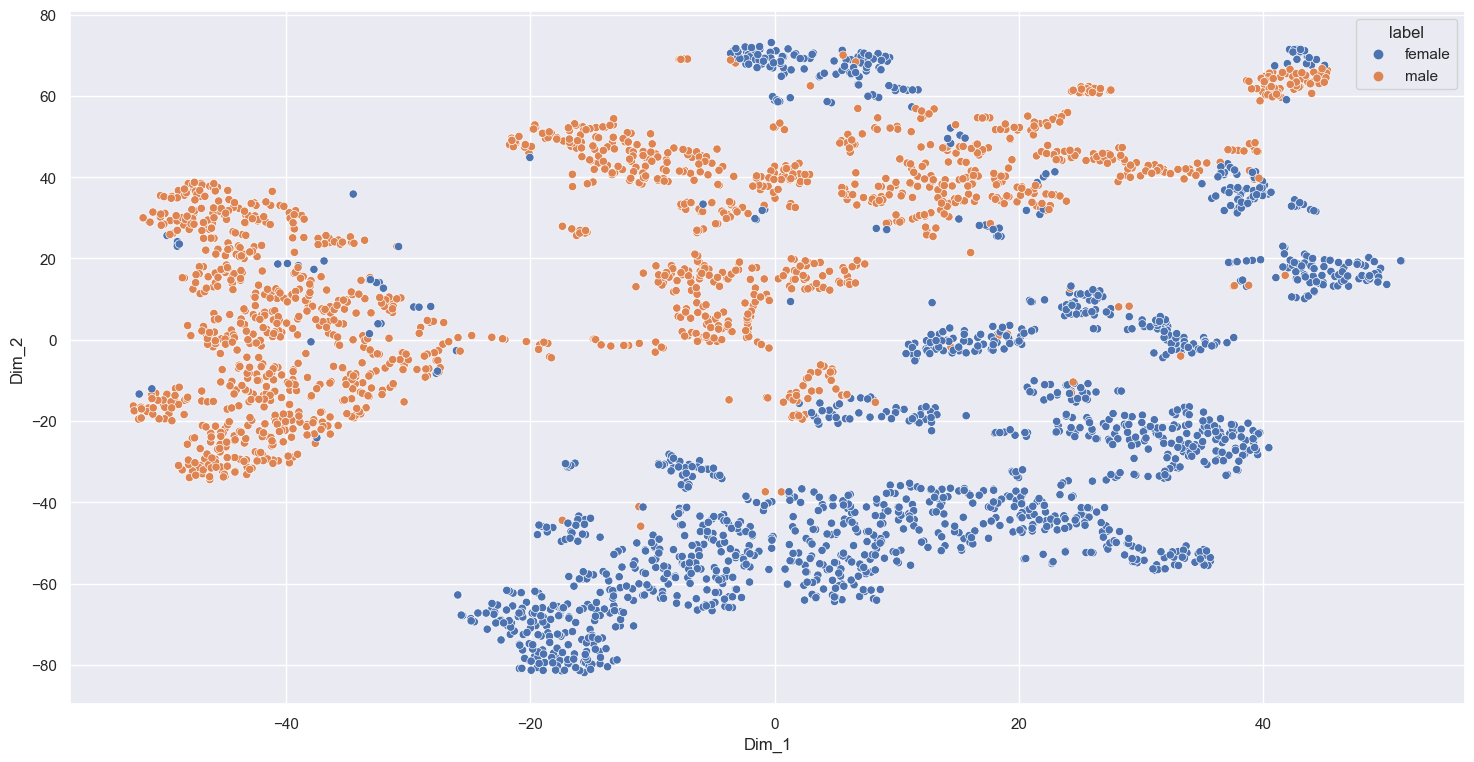

In [51]:
plt.figure(figsize=(18,9))
sb.scatterplot(x="Dim_1", y="Dim_2",hue="label",data=tsne_df);